In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
schools = pd.read_csv("schools.csv")

General overview of data
-------------------------------------------------------------------------------------------------------------------------

In [3]:
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [4]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [5]:
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


-------------------------------------------------------------------------------------------------------------------------


Missing Data
---------------------------------------------------------------------------------------------------------


In [6]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    plt.subplots(figsize=(8,6))
    plt.xticks(rotation=90)
    sns.barplot(x=ms.index, y=ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
percent_tested,20,5.333333


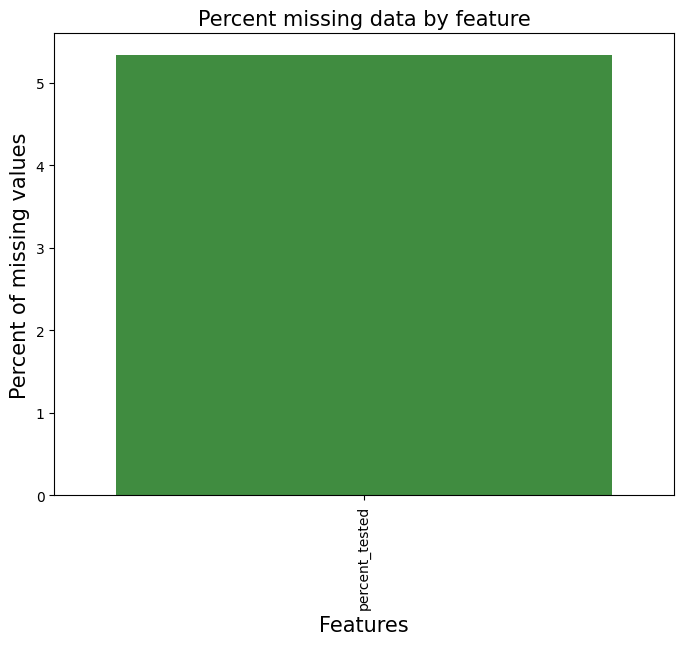

In [7]:
missingdata(schools)

-------------------------------------------------------------------------------------------------------------------------


Math Scores Observations
----------------

In [8]:
best_math_schools=schools.groupby("school_name")[["average_math"]].value_counts().reset_index()

In [9]:
best_math_schools.drop(columns="count",inplace=True)

In [10]:
#taking top 10
top_10_best_math_schools=best_math_schools.head(10)
#worse 10
worse_10_best_math_schools=best_math_schools.tail(10)

In [11]:
top_10_best_math_schools

,school_name,average_math
0,A. Philip Randolph Campus High School,459
1,ACORN Community High School,379
2,Abraham Lincoln High School,441
3,Academy for Careers in Television and Film,444
4,Academy for College Preparation and Career Exp...,386
5,Academy for Conservation and the Environment,381
6,Academy for Environmental Leadership,365
7,Academy for Health Careers,406
8,Academy for Language and Technology,371
9,Academy for Scholarship and Entrepreneurship (...,392


Top 10 Schools with best math scores

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

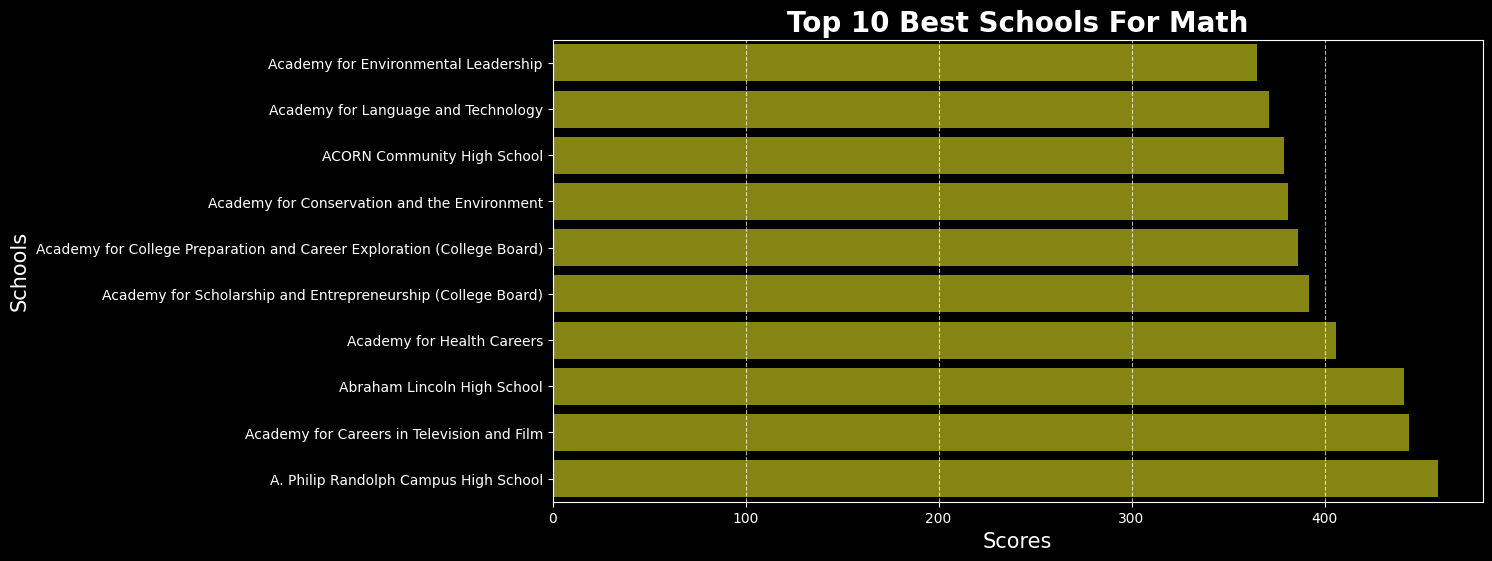

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(top_10_best_math_schools.sort_values("average_math"),y="school_name",x="average_math",alpha=0.6,color="yellow")
plt.title("Top 10 Best Schools For Math",fontsize=20,weight="bold")
plt.xlabel("Scores",fontsize=15)
plt.ylabel("Schools",fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xticks()

Bottom 10 schools with not so good math scores

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

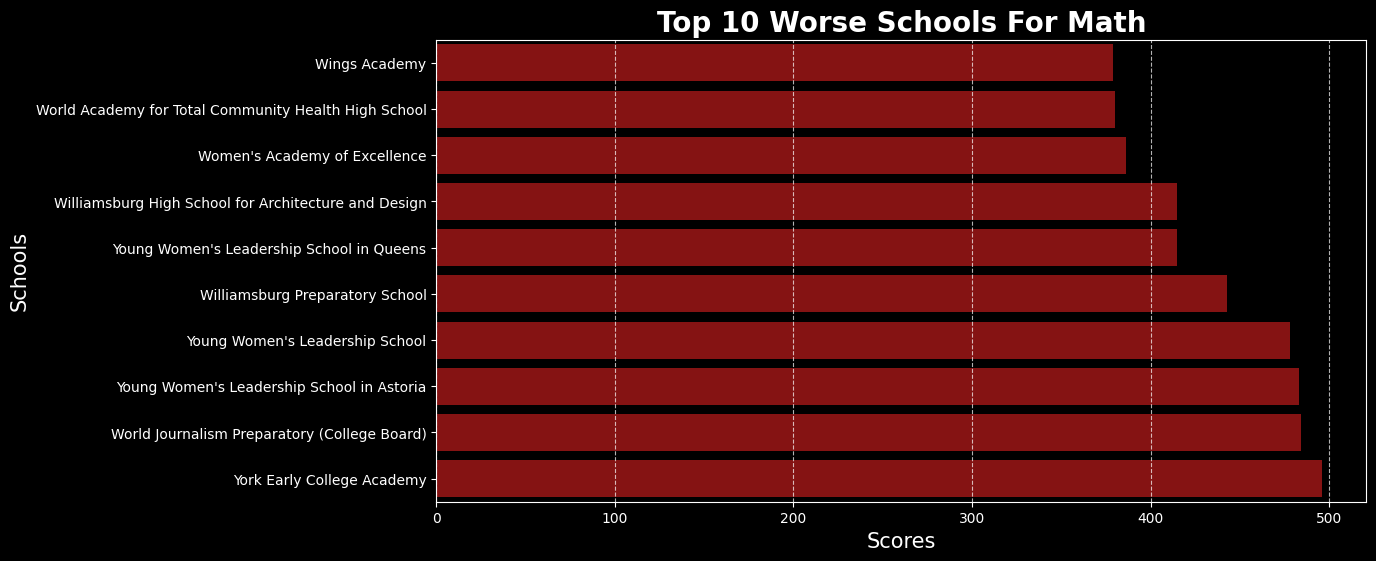

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(worse_10_best_math_schools.sort_values("average_math"),y="school_name",x="average_math",alpha=0.6,color="red")
plt.title("Top 10 Worse Schools For Math",fontsize=20,weight="bold")
plt.xlabel("Scores",fontsize=15)
plt.ylabel("Schools",fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xticks()

Distribution of math scores among NYC schools

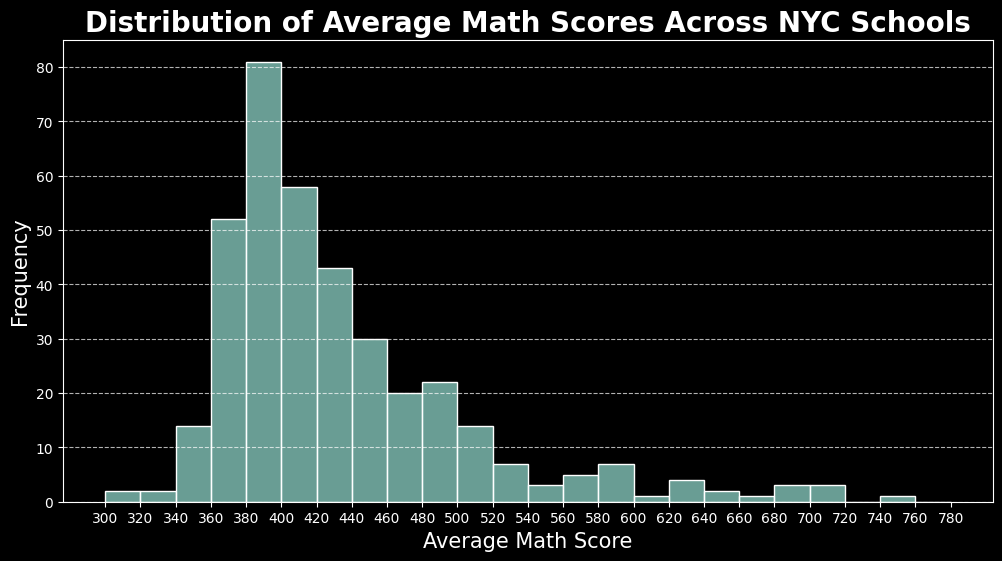

In [12]:
bins = range(300, 800, 20)  

plt.style.use("dark_background")
plt.figure(figsize=(12, 6))  
sns.histplot(data=schools, x='average_math', bins=bins)  
plt.title('Distribution of Average Math Scores Across NYC Schools',fontsize=20,weight="bold")
plt.xlabel('Average Math Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(bins)  # Set x-axis ticks to match the bin edges
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

In [13]:
schools_districts=schools.groupby(["borough","school_name"]).agg({"average_math":"mean"})

In [14]:
schools_districts

average_math
borough       school_name                                                     
Bronx         Academy for Language and Technology                        371.0
              Academy for Scholarship and Entrepreneurship (C...         392.0
              Alfred E. Smith Career and Technical Education ...         390.0
              Antonia Pantoja Preparatory Academy (College Bo...         435.0
              Archimedes Academy for Math, Science, and Techn...         418.0
...                                                                        ...
Staten Island Port Richmond High School                                  432.0
              Ralph R. McKee Career and Technical Education H...         420.0
              Staten Island Technical High School                        711.0
              Susan E. Wagner High School                                496.0
              Tottenville High School                                    494.0

[375 rows x 1 columns]

Math scores between districts

Text(0.5, 1.0, 'Math Scores Between Districts')

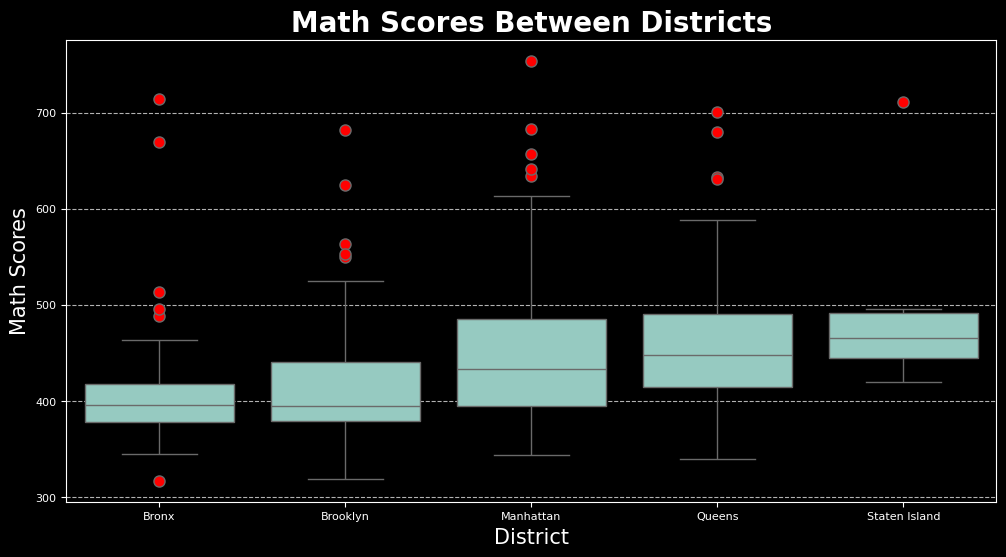

In [15]:

plt.figure(figsize=(12,6))
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

sns.boxplot(schools_districts,x="borough",y="average_math",flierprops=flierprops)
plt.xlabel("District",fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel("Math Scores",fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.title("Math Scores Between Districts",fontsize=20,weight="bold")


In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Relationship between math and reading scores across the districts

Text(0.5, 0.98, 'Relationship between Math and Reading scores')

<Figure size 2000x500 with 0 Axes>

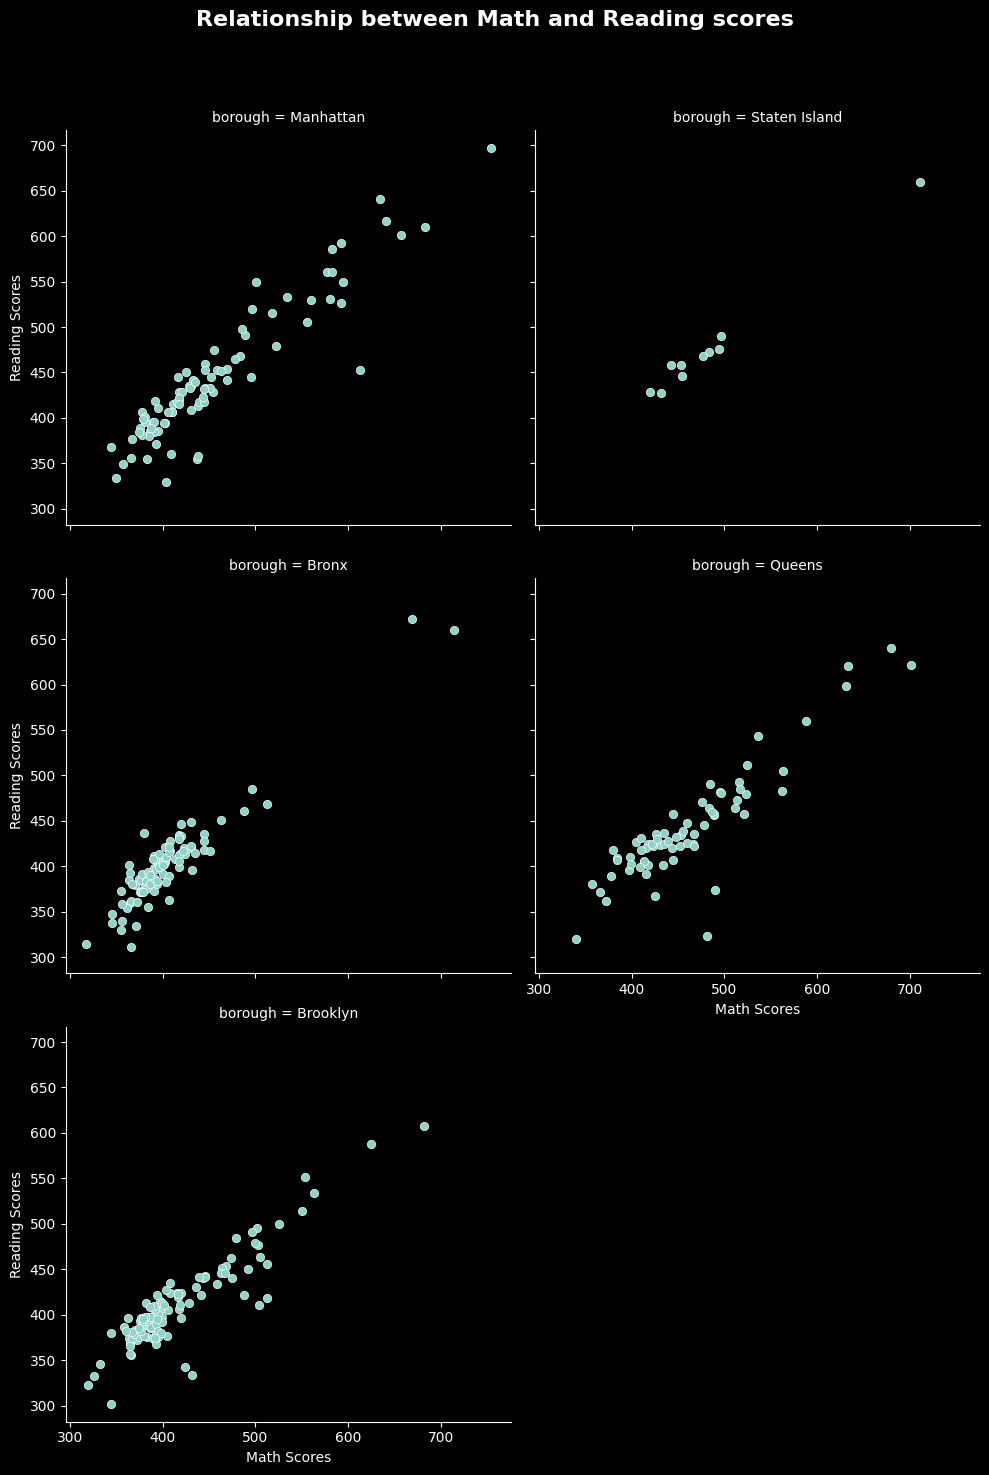

In [19]:
plt.figure(figsize=(20,5))
g=sns.relplot(schools,kind="scatter",x="average_math",y="average_reading",col="borough", col_wrap=2)
g.set_ylabels("Reading Scores")
g.set_xlabels("Math Scores")

plt.subplots_adjust(top=0.9)  # Adjust top margin to make space for the title
g.fig.suptitle("Relationship between Math and Reading scores", fontsize=16,weight="bold")

Correlation between math, reading and writing

<Axes: title={'center': 'Correlation between tests'}>

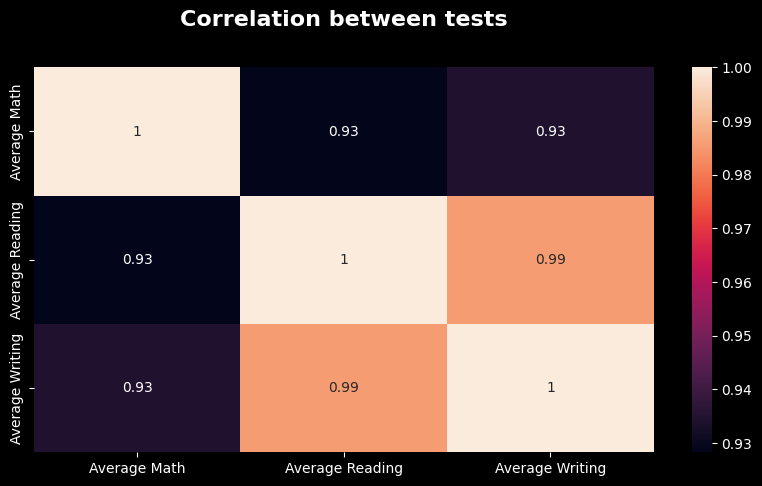

In [29]:
df=schools.corr(numeric_only=True)
df=df.drop(columns="percent_tested",index="percent_tested")
df=df.rename(columns={"average_math":"Average Math","average_reading":"Average Reading","average_writing":"Average Writing"},
             index={"average_math":"Average Math","average_reading":"Average Reading","average_writing":"Average Writing"})

plt.figure(figsize=(10,5))
 
plt.title("Correlation between tests",fontsize=16,weight="bold",pad=30)

sns.heatmap(df,cmap="rocket",annot=True)




--------------------------------------------------------------------------------------------------------------------------

What are the top 10 performing schools based on the combined SAT scores? 
----------------------------------------------------------------------------------------------------------------------------


Inserting "total_SAT" column

In [32]:
schools["total_SAT"]=schools["average_math"]+schools["average_reading"]+schools["average_writing"]

In [33]:
schools.head(2)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193


Sorting by SAT column and renaming columns



In [36]:
top_10_sat=schools.sort_values("total_SAT",ascending=False)

In [45]:
top_10_sat=top_10_sat.rename(columns={"average_math":"math","average_reading":"reading","average_writing":"writing","total_SAT":"SAT"}).head(10)

In [47]:
top_10_sat

,school_name,borough,building_code,math,reading,writing,percent_tested,SAT
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9,1947
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8,1914
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5,1896
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0,1889
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6,1889


In [62]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500')])

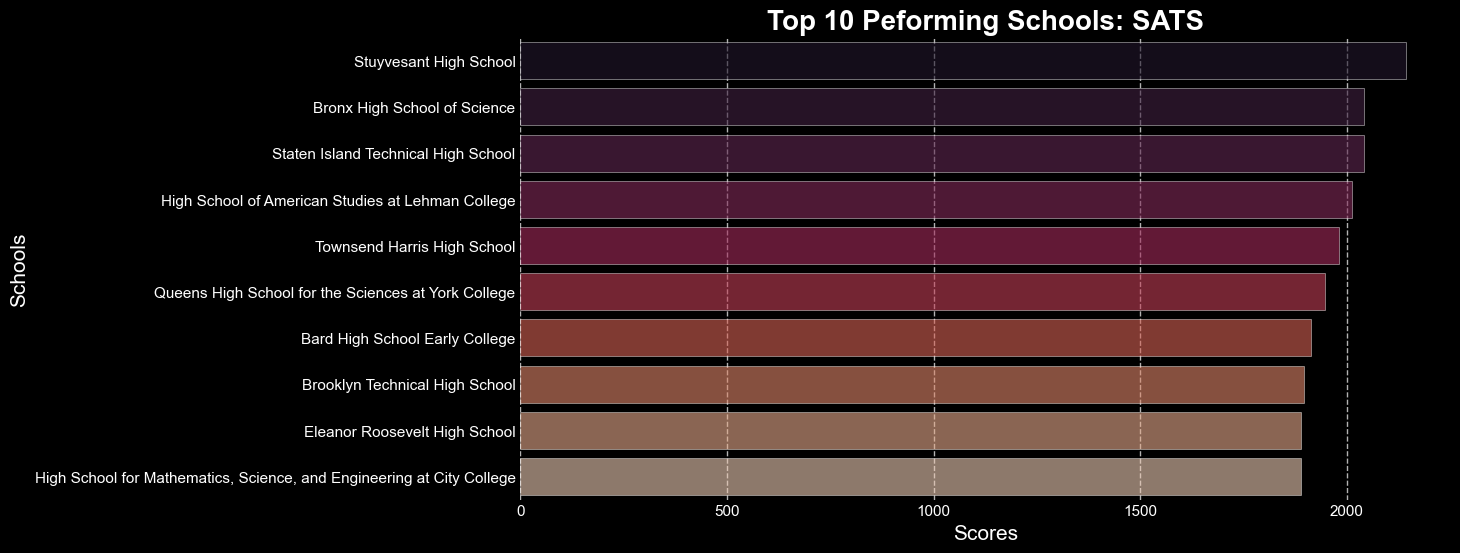

In [70]:
plt.figure(figsize=(12,6))

sns.barplot(top_10_sat,y="school_name",x="SAT",alpha=0.6,hue="school_name",palette="rocket",legend=False)
plt.title("Top 10 Peforming Schools: SATS",fontsize=20,weight="bold")
plt.xlabel("Scores",fontsize=15)
plt.ylabel("Schools",fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xticks()

-------------

Deviation of SAT scores among the districts
----

Grouping by district and aggregating using count,mean and standard deviation functions

In [78]:
df=schools.groupby("borough")["total_SAT"].agg(["count","mean","std"]).sort_values("std")

Text(0.5, 0, 'Districts')

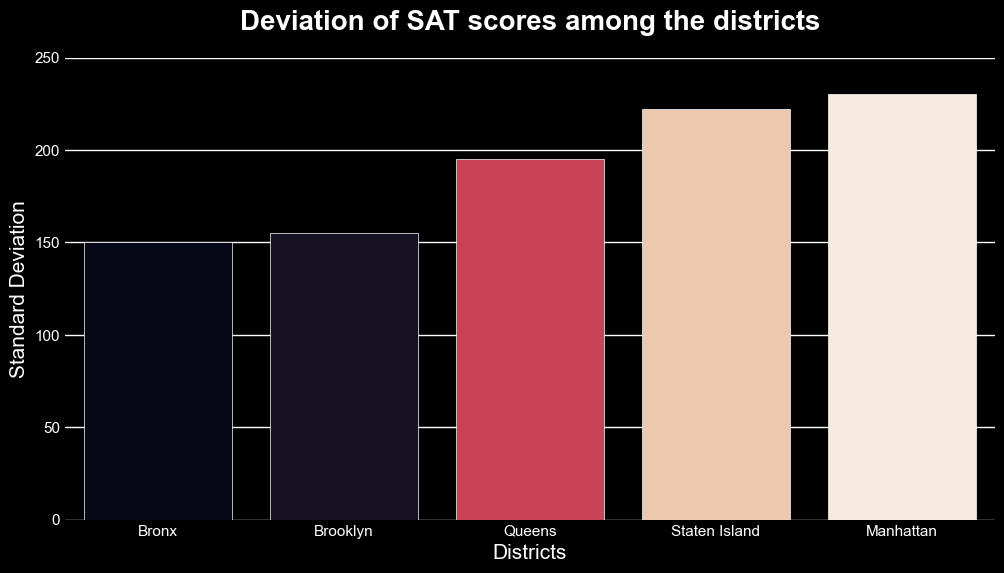

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(df,x="borough",y="std",hue="std",palette="rocket",legend=False)
plt.title("Deviation of SAT scores among the districts",pad=20,weight="bold",fontsize=20)
plt.ylim(0, 250)
plt.ylabel("Standard Deviation",fontsize=15)
plt.xlabel("Districts",fontsize=15)